# Mesa ABM of the Keep Threshold Relay

### Simulation notes and instructions

Notes:
* Nodes are created simulataneously using the Mesa SimultaneousActivation scheduler
* The nodes go through a bootstrap phase based on Antonio's diagram. They can only form groups if they are in the mainloop forked state.
* Relay requests are currently bernoulli trials
* Singature events are modeled by default as asynchronous with a step delay to mimick the block delay

Instructions:
1. Change variables
2. Click on the restart and run kernel icon for ipython

    

In [1]:
import random
import simpy
import datetime
import numpy as np
import pandas as pd
import agent
import model
import matplotlib.pyplot as plt
import simulation_functions as sc

**Initialize Variables**

In [2]:
group_size = 5 # Group size
#total_tickets = 500 # total virtual stakers
nodes = 5 # number of nodes
active_group_threshold = 4 # min number of active groups to pick from
signature_threshold = 2  # min number of nodes needed to sign
group_expiry = 5 #number of steps after which a group expires
group_formation_threshold = 3 # min number of nodes needed to create a group
node_failure_percent = 15 # % of times nodes fail and have to reconnect
node_death_percent = 5 # % of time nodes fail and do not reconnect


Text(0.5, 1.0, 'Virtual Staker Cumulative Distribution')

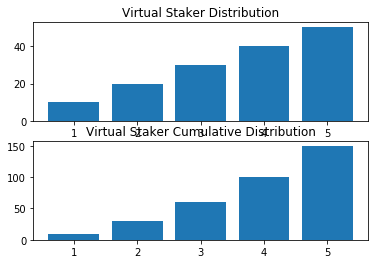

In [3]:
# Pre-processing Staker distributions
# Linear y = m * (x + 1) since indices start from 0
ticket_distribution = np.zeros(nodes) 

for i in range (0, nodes):
    ticket_distribution[i] =  10 * (i + 1) # m = 50 gives max y as 1000 which is 2% of 50000

x = np.linspace(1,nodes,nodes)
plt.subplot(2, 1, 1)
plt.bar(x, ticket_distribution)
plt.title("Virtual Staker Distribution")

cdf_L02=sc.create_cdf(nodes,ticket_distribution)
plt.subplot(2, 1, 2)
plt.bar(x, cdf_L02)
plt.title("Virtual Staker Cumulative Distribution")

In [4]:
beacon_model = model.Beacon_Model(nodes, ticket_distribution, active_group_threshold, group_size, signature_threshold, group_expiry, group_formation_threshold, node_failure_percent, node_death_percent)

In [5]:
active_group_size = []
signature_failures = []
for i in range (200):
    beacon_model.step()
    active_group_size.append(len(beacon_model.active_groups))
    print("signature failure events")
    print(beacon_model.unsuccessful_signature_events)
    

refreshing active nodes list
Number of nodes in the forked state = 0
bootstrapping active groups
number of active groups = 0
relay request recieved? = True
     selecting group at random
     no active groups available
     registering new group
             Not enough nodes to register a group
signature failure events
[0]
refreshing active nodes list
Number of nodes in the forked state = 3
bootstrapping active groups
number of active groups = 4
group ID 5status = Activesteps to expiry = 5
group ID 6status = Activesteps to expiry = 5
group ID 7status = Activesteps to expiry = 5
group ID 8status = Activesteps to expiry = 5
relay request recieved? = True
     selecting group at random
Starting signature process:
     Checking for active nodes in randomly selected group
6
         signature successful
     registering new group
signature failure events
[0, 0]
refreshing active nodes list
Number of nodes in the forked state = 3
number of active groups = 5
group ID 5status = Activesteps to 

group ID 40status = Expiredsteps to expiry = -9
group ID 41status = Expiredsteps to expiry = -7
group ID 42status = Expiredsteps to expiry = -6
group ID 43status = Expiredsteps to expiry = -5
group ID 44status = Expiredsteps to expiry = -3
group ID 45status = Expiredsteps to expiry = -2
group ID 46status = Expiredsteps to expiry = -1
group ID 47status = Activesteps to expiry = 2
relay request recieved? = True
     selecting group at random
Starting signature process:
     Checking for active nodes in randomly selected group
6
         signature successful
     registering new group
signature failure events
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
refreshing active nodes list
Number of nodes in the forked state = 3
number of active groups = 2
group ID 5status = Expiredsteps to expiry = -58
group ID 6status = Expiredsteps to expiry = -58


group ID 45status = Expiredsteps to expiry = -31
group ID 46status = Expiredsteps to expiry = -30
group ID 47status = Expiredsteps to expiry = -27
group ID 48status = Expiredsteps to expiry = -24
group ID 49status = Expiredsteps to expiry = -23
group ID 50status = Expiredsteps to expiry = -22
group ID 51status = Expiredsteps to expiry = -21
group ID 52status = Expiredsteps to expiry = -20
group ID 53status = Expiredsteps to expiry = -18
group ID 54status = Expiredsteps to expiry = -16
group ID 55status = Expiredsteps to expiry = -15
group ID 56status = Expiredsteps to expiry = -14
group ID 57status = Expiredsteps to expiry = -11
group ID 58status = Expiredsteps to expiry = -8
group ID 59status = Expiredsteps to expiry = -7
group ID 60status = Expiredsteps to expiry = -6
group ID 61status = Expiredsteps to expiry = -4
group ID 62status = Expiredsteps to expiry = -3
group ID 63status = Expiredsteps to expiry = -2
relay request recieved? = False
     No relay request
signature failure eve

group ID 47status = Expiredsteps to expiry = -55
group ID 48status = Expiredsteps to expiry = -52
group ID 49status = Expiredsteps to expiry = -51
group ID 50status = Expiredsteps to expiry = -50
group ID 51status = Expiredsteps to expiry = -49
group ID 52status = Expiredsteps to expiry = -48
group ID 53status = Expiredsteps to expiry = -46
group ID 54status = Expiredsteps to expiry = -44
group ID 55status = Expiredsteps to expiry = -43
group ID 56status = Expiredsteps to expiry = -42
group ID 57status = Expiredsteps to expiry = -39
group ID 58status = Expiredsteps to expiry = -36
group ID 59status = Expiredsteps to expiry = -35
group ID 60status = Expiredsteps to expiry = -34
group ID 61status = Expiredsteps to expiry = -32
group ID 62status = Expiredsteps to expiry = -31
group ID 63status = Expiredsteps to expiry = -30
group ID 64status = Expiredsteps to expiry = -22
group ID 65status = Expiredsteps to expiry = -18
group ID 66status = Expiredsteps to expiry = -17
group ID 67status = 

group ID 53status = Expiredsteps to expiry = -69
group ID 54status = Expiredsteps to expiry = -67
group ID 55status = Expiredsteps to expiry = -66
group ID 56status = Expiredsteps to expiry = -65
group ID 57status = Expiredsteps to expiry = -62
group ID 58status = Expiredsteps to expiry = -59
group ID 59status = Expiredsteps to expiry = -58
group ID 60status = Expiredsteps to expiry = -57
group ID 61status = Expiredsteps to expiry = -55
group ID 62status = Expiredsteps to expiry = -54
group ID 63status = Expiredsteps to expiry = -53
group ID 64status = Expiredsteps to expiry = -45
group ID 65status = Expiredsteps to expiry = -41
group ID 66status = Expiredsteps to expiry = -40
group ID 67status = Expiredsteps to expiry = -37
group ID 68status = Expiredsteps to expiry = -33
group ID 69status = Expiredsteps to expiry = -32
group ID 70status = Expiredsteps to expiry = -30
group ID 71status = Expiredsteps to expiry = -29
group ID 72status = Expiredsteps to expiry = -27
group ID 73status = 

group ID 40status = Expiredsteps to expiry = -112
group ID 41status = Expiredsteps to expiry = -110
group ID 42status = Expiredsteps to expiry = -109
group ID 43status = Expiredsteps to expiry = -108
group ID 44status = Expiredsteps to expiry = -106
group ID 45status = Expiredsteps to expiry = -105
group ID 46status = Expiredsteps to expiry = -104
group ID 47status = Expiredsteps to expiry = -101
group ID 48status = Expiredsteps to expiry = -98
group ID 49status = Expiredsteps to expiry = -97
group ID 50status = Expiredsteps to expiry = -96
group ID 51status = Expiredsteps to expiry = -95
group ID 52status = Expiredsteps to expiry = -94
group ID 53status = Expiredsteps to expiry = -92
group ID 54status = Expiredsteps to expiry = -90
group ID 55status = Expiredsteps to expiry = -89
group ID 56status = Expiredsteps to expiry = -88
group ID 57status = Expiredsteps to expiry = -85
group ID 58status = Expiredsteps to expiry = -82
group ID 59status = Expiredsteps to expiry = -81
group ID 60s

group ID 98status = Expiredsteps to expiry = -17
group ID 99status = Expiredsteps to expiry = -14
group ID 100status = Expiredsteps to expiry = -7
group ID 101status = Expiredsteps to expiry = -6
group ID 102status = Expiredsteps to expiry = -1
group ID 103status = Activesteps to expiry = 2
group ID 104status = Activesteps to expiry = 3
group ID 105status = Activesteps to expiry = 4
relay request recieved? = True
     selecting group at random
Starting signature process:
     Checking for active nodes in randomly selected group
3
         signature successful
     registering new group
signature failure events
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 

3.0


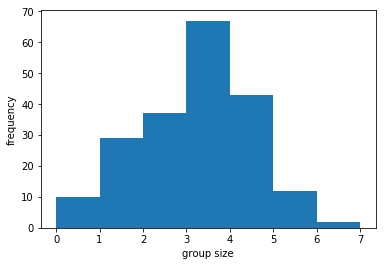

In [6]:
plt.hist(active_group_size, bins=range(max(active_group_size)+1))
plt.xlabel("group size")
plt.ylabel("frequency")
print(np.median(active_group_size))

Text(0, 0.5, 'group size')

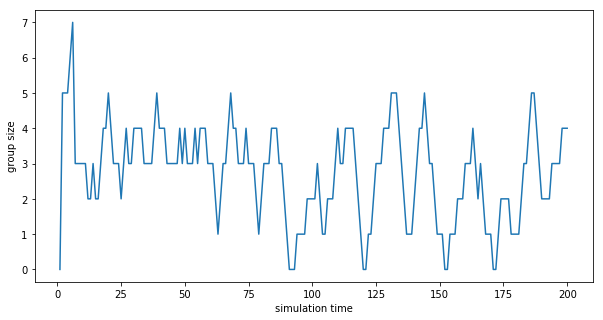

In [7]:
plt.figure(figsize = (10,5))
plt.plot(np.linspace(1,len(active_group_size),len(active_group_size)),active_group_size)
plt.xlabel("simulation time")
plt.ylabel("active groups")

Text(0, 0.5, 'Signature failure events')

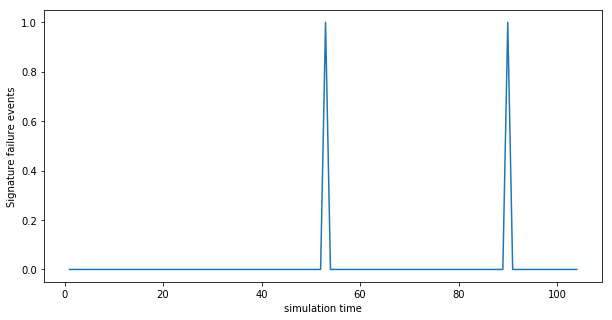

In [10]:
plt.figure(figsize = (10,5))
plt.plot(np.linspace(1,len(beacon_model.unsuccessful_signature_events),
                     len(beacon_model.unsuccessful_signature_events)),
                     beacon_model.unsuccessful_signature_events)
plt.xlabel("simulation time")
plt.ylabel("Signature failure events")

In [9]:
Notes:
    Add in a delay between when the request occurs and a signature occurs this triggers new group formation
    Add gap between triggering group formation and registering the group
    
next Question:
    Whats the distribution of group ownership for each node that owns at least 1 group
    
    What % of nodes own at least 1 group
    
    How likely is it for a node to have a group that it owns to produce a signature 
    

Look at the edges to make sure node generation is close to representing real world behavior - Markus

SyntaxError: invalid syntax (<ipython-input-9-38fe4acd8384>, line 1)